# Application Results

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools

Set path:

In [2]:
path = 'C:/Users/Meier/Institut für Statistik Dropbox/Johanna Meier/Structural Breaks + DL/Application/'

Set dataset:

In [3]:
data_names = ['voltage_2022-09-18','voltage_2022-10-01','voltage_2022-10-08','voltage_2023-01-08']

Set metric:

In [4]:
metric = 0 # RMSE: 0, MAE: 1, MAPE: 2, R^2: 3

## Best Performance

In [17]:
ind = ['EXP', 'RAY', 'BAR', 'PAR', 'TUK','PB']
col1 = ['18/09/2022','01/10/2022','08/10/2022','08/01/2023']
col2 = ['RNN','LSTM','GRU']
columns = pd.MultiIndex.from_tuples(list(itertools.product(col1, col2)))
df_best = pd.DataFrame(columns = columns, index = ind)
df_best.index.names = ['Weights']
df_best = df_best.T

In [18]:
dates = ['18/09/2022','01/10/2022','08/10/2022','08/01/2023']
str_model = ['RNN', 'LSTM', 'GRU']
weight_type = ['exponential', 'rayleigh', 'bartlett', 'parzen' , 'tukey-hanning']
for k in range(len(dates)):
    for i in range(len(str_model)):
        for j in range(len(weight_type)+1):
            if j==len(weight_type):
                with np.load(path+'Results/'+data_names[k]+'_'+str_model[i]+'_results.npz') as data_ref:
                    with np.load(path+'Results/'+data_names[k]+'_postbreak_'+str_model[i]+'_results.npz') as data:
                        df_best.loc[(col1[k],col2[i]),ind[j]] = np.round(data['best_metrics'][0][metric]**2/data_ref['best_metrics'][0][metric]**2,4)
            else:
                with np.load(path+'Results/'+data_names[k]+'_'+str_model[i]+'_results.npz') as data_ref:
                    with np.load(path+'Results/'+data_names[k]+'_'+str_model[i]+'_'+weight_type[j-1]+'_results.npz') as data:
                        df_best.loc[(col1[k],col2[i]),ind[j]] = np.round(data['best_metrics'][0][metric]**2/data_ref['best_metrics'][0][metric]**2,4)

In [19]:
df_best

Weights             EXP     RAY     BAR     PAR     TUK      PB
18/09/2022 RNN   0.9561  0.9602  0.9556  0.9555  0.9584  0.9505
           LSTM  0.9968  0.9793  0.9926  0.9907  0.9855  0.9696
           GRU   0.9747  0.9638   0.969  0.9736  0.9733  0.9551
01/10/2022 RNN      1.0  0.9721  0.9559  1.0086  0.9974  1.1744
           LSTM  1.0224  0.9992  1.0243  1.0198  1.0075  1.1839
           GRU    1.025  0.9825  1.0021   1.018  1.0095  1.1653
08/10/2022 RNN   1.0037  0.9533   0.914  0.9564  0.9153  1.0508
           LSTM  0.9364  0.9625   0.941   0.953  0.9533  1.3051
           GRU   0.9703  0.9522  0.9278  0.9982  0.9252  1.2049
08/01/2023 RNN   0.9002  0.7989  0.7811  0.7766  0.8461  0.7957
           LSTM  1.0162  0.9791  0.9172  0.9958  0.9921  0.9588
           GRU   0.9887  0.9261  0.8964  0.9939  0.9923   0.921

In [20]:
print(df_best.to_latex(escape=False))

\begin{tabular}{llllllll}
\toprule
           & Weights &     EXP &     RAY &     BAR &     PAR &     TUK &      PB \\
\midrule
18/09/2022 & RNN &  0.9561 &  0.9602 &  0.9556 &  0.9555 &  0.9584 &  0.9505 \\
           & LSTM &  0.9968 &  0.9793 &  0.9926 &  0.9907 &  0.9855 &  0.9696 \\
           & GRU &  0.9747 &  0.9638 &   0.969 &  0.9736 &  0.9733 &  0.9551 \\
01/10/2022 & RNN &     1.0 &  0.9721 &  0.9559 &  1.0086 &  0.9974 &  1.1744 \\
           & LSTM &  1.0224 &  0.9992 &  1.0243 &  1.0198 &  1.0075 &  1.1839 \\
           & GRU &   1.025 &  0.9825 &  1.0021 &   1.018 &  1.0095 &  1.1653 \\
08/10/2022 & RNN &  1.0037 &  0.9533 &   0.914 &  0.9564 &  0.9153 &  1.0508 \\
           & LSTM &  0.9364 &  0.9625 &   0.941 &   0.953 &  0.9533 &  1.3051 \\
           & GRU &  0.9703 &  0.9522 &  0.9278 &  0.9982 &  0.9252 &  1.2049 \\
08/01/2023 & RNN &  0.9002 &  0.7989 &  0.7811 &  0.7766 &  0.8461 &  0.7957 \\
           & LSTM &  1.0162 &  0.9791 &  0.9172 &  0.9958 &  0.9921 &

## Overall Performance

In [9]:
SMALL_SIZE = 26
MEDIUM_SIZE = 28
BIGGER_SIZE = 30

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

Select model:

In [81]:
def adjust_lightness(color, amount=0.5):
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], max(0, min(1, amount * c[1])), c[2])

In [22]:
dates = ['18/09/2022','01/10/2022','08/10/2022','08/01/2023']
weight_type = ['exponential', 'rayleigh', 'bartlett', 'parzen' , 'tukey-hanning']
ind = ['EQUAL','EXP', 'RAY', 'BAR', 'PAR', 'TUK','PB']

In [116]:
str_model = 'RNN'

C:\Users\Meier\Programme\anaconda3\envs\Env_StructuralBreaks\lib\site-packages\ipykernel_launcher.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


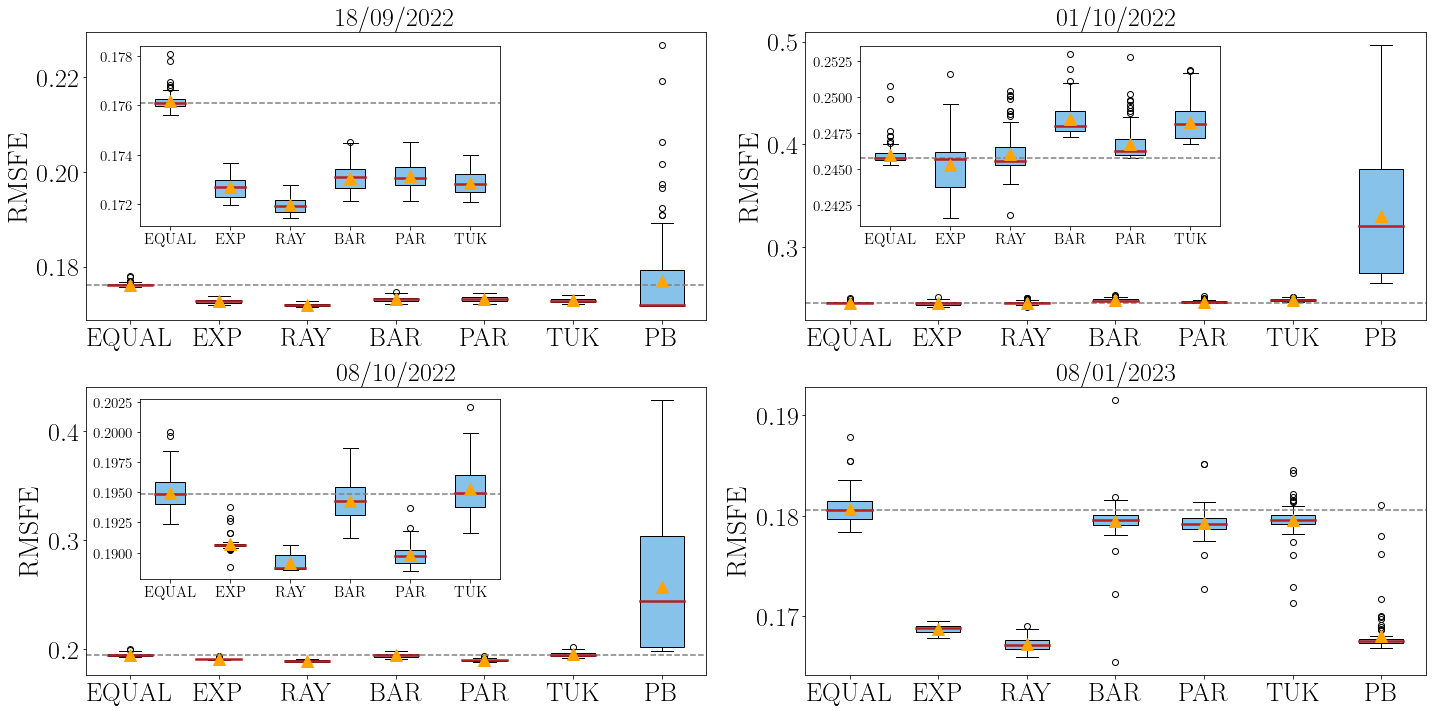

In [117]:
fig, axs = plt.subplots(2,2, figsize=(20, 10))
cmap = plt.get_cmap("tab10")
medianprops = dict(linewidth=2.5, color='firebrick')
meanprops = dict(markerfacecolor='orange', markeredgecolor='orange', markersize='12')
boxprops=dict(facecolor=adjust_lightness(cmap(0),1.75))

for i in range(len(dates)):
    df_data = pd.DataFrame()
    for j in range(len(weight_type)+2):
        if j==0:
            with np.load(path+'Results/'+data_names[i]+'_'+str_model+'_results.npz') as data:
                df_data = pd.concat([df_data,pd.DataFrame(data['all_metrics'][:,metric])], axis=1, ignore_index=True)
        elif j==len(weight_type)+1:
            with np.load(path+'Results/'+data_names[i]+'_postbreak_'+str_model+'_results.npz') as data:
                df_data = pd.concat([df_data,pd.DataFrame(data['all_metrics'][:,metric])], axis=1, ignore_index=True)
        else:    
            with np.load(path+'Results/'+data_names[i]+'_'+str_model+'_'+weight_type[j-1]+'_results.npz') as data:
                df_data = pd.concat([df_data,pd.DataFrame(data['all_metrics'][:,metric])], axis=1, ignore_index=True)
    if i==0:
        i1 = 0
        i2 = 0
    elif i==1:
        i1 = 0
        i2 = 1
    elif i==2:
        i1 = 1
        i2 = 0
    else:
        i1 = 1
        i2 = 1
    
    axs[i1,i2].boxplot(df_data, showmeans=True,patch_artist=True,medianprops=medianprops,meanprops=meanprops,boxprops=boxprops)
    axs[i1,i2].axhline(np.median(df_data.iloc[:,0]), linestyle='--', color='grey')
    axs[i1,i2].set_title(dates[i])
    axs[i1,i2].set_ylabel('RMSFE')
    axs[i1,i2].set_xticks(list(range(1,len(weight_type)+3)),ind[:len(weight_type)+2])
    
    # add zooms plots
    if i==0:
        axszoom = fig.add_axes([0.1,0.68,0.25,0.25])
        axszoom.boxplot(df_data.iloc[:,:len(df_data.columns)-1], showmeans=True,patch_artist=True,medianprops=medianprops,meanprops=meanprops,boxprops=boxprops)
        axszoom.axhline(np.median(df_data.iloc[:,0]), linestyle='--', color='grey')
        axszoom.set_xticks(list(range(1,len(weight_type)+2)),ind[:len(weight_type)+1])
        axszoom.tick_params(labelsize=15)
    elif i==1:
        axszoom = fig.add_axes([0.6,0.68,0.25,0.25])
        axszoom.boxplot(df_data.iloc[:,:len(df_data.columns)-1], showmeans=True,patch_artist=True,medianprops=medianprops,meanprops=meanprops,boxprops=boxprops)
        axszoom.axhline(np.median(df_data.iloc[:,0]), linestyle='--', color='grey')
        axszoom.set_xticks(list(range(1,len(weight_type)+2)),ind[:len(weight_type)+1])
        axszoom.tick_params(labelsize=15)
    elif i==2:
        axszoom = fig.add_axes([0.1,0.19,0.25,0.25])
        axszoom.boxplot(df_data.iloc[:,:len(df_data.columns)-1], showmeans=True,patch_artist=True,medianprops=medianprops,meanprops=meanprops,boxprops=boxprops)
        axszoom.axhline(np.median(df_data.iloc[:,0]), linestyle='--', color='grey')
        axszoom.set_xticks(list(range(1,len(weight_type)+2)),ind[:len(weight_type)+1])
        axszoom.tick_params(labelsize=15)

fig.tight_layout()
plt.subplots_adjust(wspace=0.16)
plt.savefig(path+'Figures/'+'overallperf_voltage_'+str_model+'.pdf', bbox_inches='tight')
plt.show()

In [114]:
str_model = 'LSTM'

C:\Users\Meier\Programme\anaconda3\envs\Env_StructuralBreaks\lib\site-packages\ipykernel_launcher.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


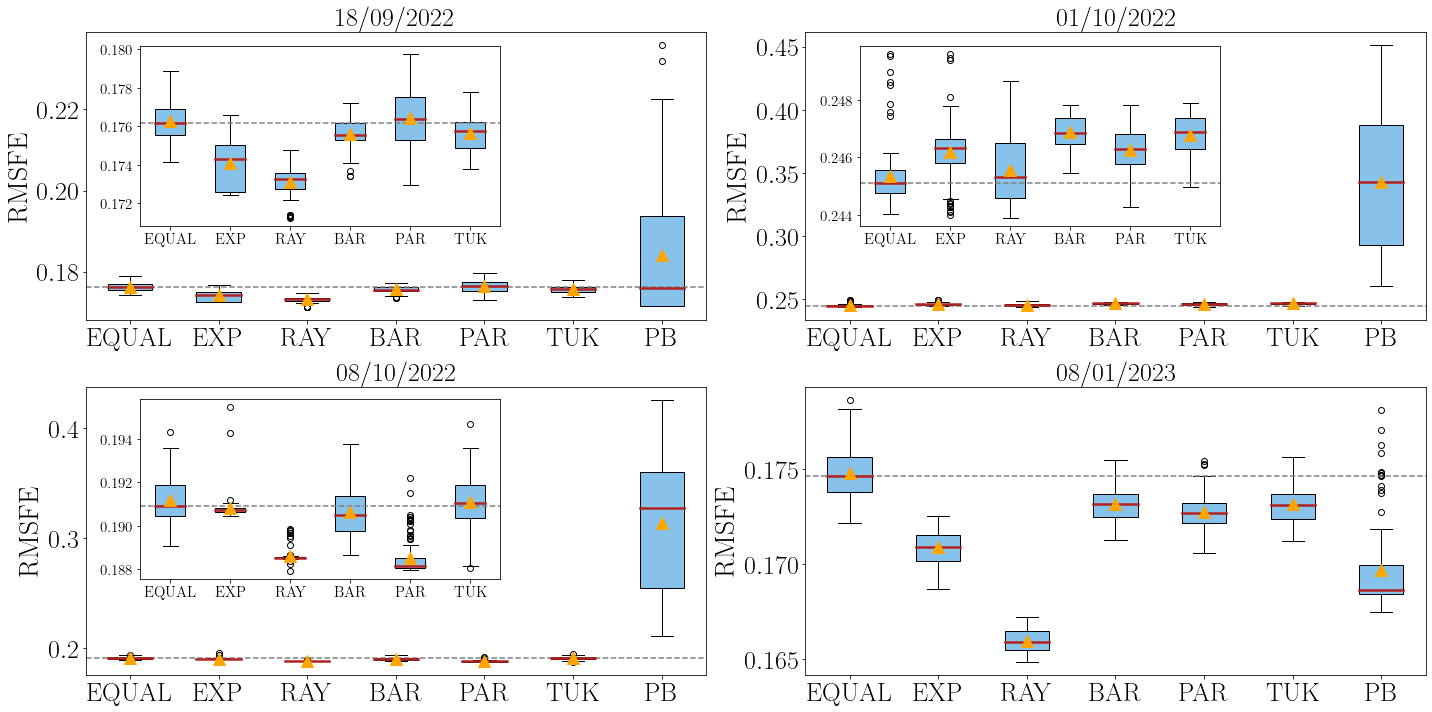

In [115]:
fig, axs = plt.subplots(2,2, figsize=(20, 10))
cmap = plt.get_cmap("tab10")
medianprops = dict(linewidth=2.5, color='firebrick')
meanprops = dict(markerfacecolor='orange', markeredgecolor='orange', markersize='12')
boxprops=dict(facecolor=adjust_lightness(cmap(0),1.75))

for i in range(len(dates)):
    df_data = pd.DataFrame()
    for j in range(len(weight_type)+2):
        if j==0:
            with np.load(path+'Results/'+data_names[i]+'_'+str_model+'_results.npz') as data:
                df_data = pd.concat([df_data,pd.DataFrame(data['all_metrics'][:,metric])], axis=1, ignore_index=True)
        elif j==len(weight_type)+1:
            with np.load(path+'Results/'+data_names[i]+'_postbreak_'+str_model+'_results.npz') as data:
                df_data = pd.concat([df_data,pd.DataFrame(data['all_metrics'][:,metric])], axis=1, ignore_index=True)
        else:    
            with np.load(path+'Results/'+data_names[i]+'_'+str_model+'_'+weight_type[j-1]+'_results.npz') as data:
                df_data = pd.concat([df_data,pd.DataFrame(data['all_metrics'][:,metric])], axis=1, ignore_index=True)
    if i==0:
        i1 = 0
        i2 = 0
    elif i==1:
        i1 = 0
        i2 = 1
    elif i==2:
        i1 = 1
        i2 = 0
    else:
        i1 = 1
        i2 = 1
    
    axs[i1,i2].boxplot(df_data, showmeans=True,patch_artist=True,medianprops=medianprops,meanprops=meanprops,boxprops=boxprops)
    axs[i1,i2].axhline(np.median(df_data.iloc[:,0]), linestyle='--', color='grey')
    axs[i1,i2].set_title(dates[i])
    axs[i1,i2].set_ylabel('RMSFE')
    axs[i1,i2].set_xticks(list(range(1,len(weight_type)+3)),ind[:len(weight_type)+2])
    
    # add zooms plots
    if i==0:
        axszoom = fig.add_axes([0.1,0.68,0.25,0.25])
        axszoom.boxplot(df_data.iloc[:,:len(df_data.columns)-1], showmeans=True,patch_artist=True,medianprops=medianprops,meanprops=meanprops,boxprops=boxprops)
        axszoom.axhline(np.median(df_data.iloc[:,0]), linestyle='--', color='grey')
        axszoom.set_xticks(list(range(1,len(weight_type)+2)),ind[:len(weight_type)+1])
        axszoom.tick_params(labelsize=15)
    elif i==1:
        axszoom = fig.add_axes([0.6,0.68,0.25,0.25])
        axszoom.boxplot(df_data.iloc[:,:len(df_data.columns)-1], showmeans=True,patch_artist=True,medianprops=medianprops,meanprops=meanprops,boxprops=boxprops)
        axszoom.axhline(np.median(df_data.iloc[:,0]), linestyle='--', color='grey')
        axszoom.set_xticks(list(range(1,len(weight_type)+2)),ind[:len(weight_type)+1])
        axszoom.tick_params(labelsize=15)
    elif i==2:
        axszoom = fig.add_axes([0.1,0.19,0.25,0.25])
        axszoom.boxplot(df_data.iloc[:,:len(df_data.columns)-1], showmeans=True,patch_artist=True,medianprops=medianprops,meanprops=meanprops,boxprops=boxprops)
        axszoom.axhline(np.median(df_data.iloc[:,0]), linestyle='--', color='grey')
        axszoom.set_xticks(list(range(1,len(weight_type)+2)),ind[:len(weight_type)+1])
        axszoom.tick_params(labelsize=15)

fig.tight_layout()
plt.subplots_adjust(wspace=0.16)
plt.savefig(path+'Figures/'+'overallperf_voltage_'+str_model+'.pdf', bbox_inches='tight')
plt.show()

In [110]:
str_model = 'GRU'

C:\Users\Meier\Programme\anaconda3\envs\Env_StructuralBreaks\lib\site-packages\ipykernel_launcher.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


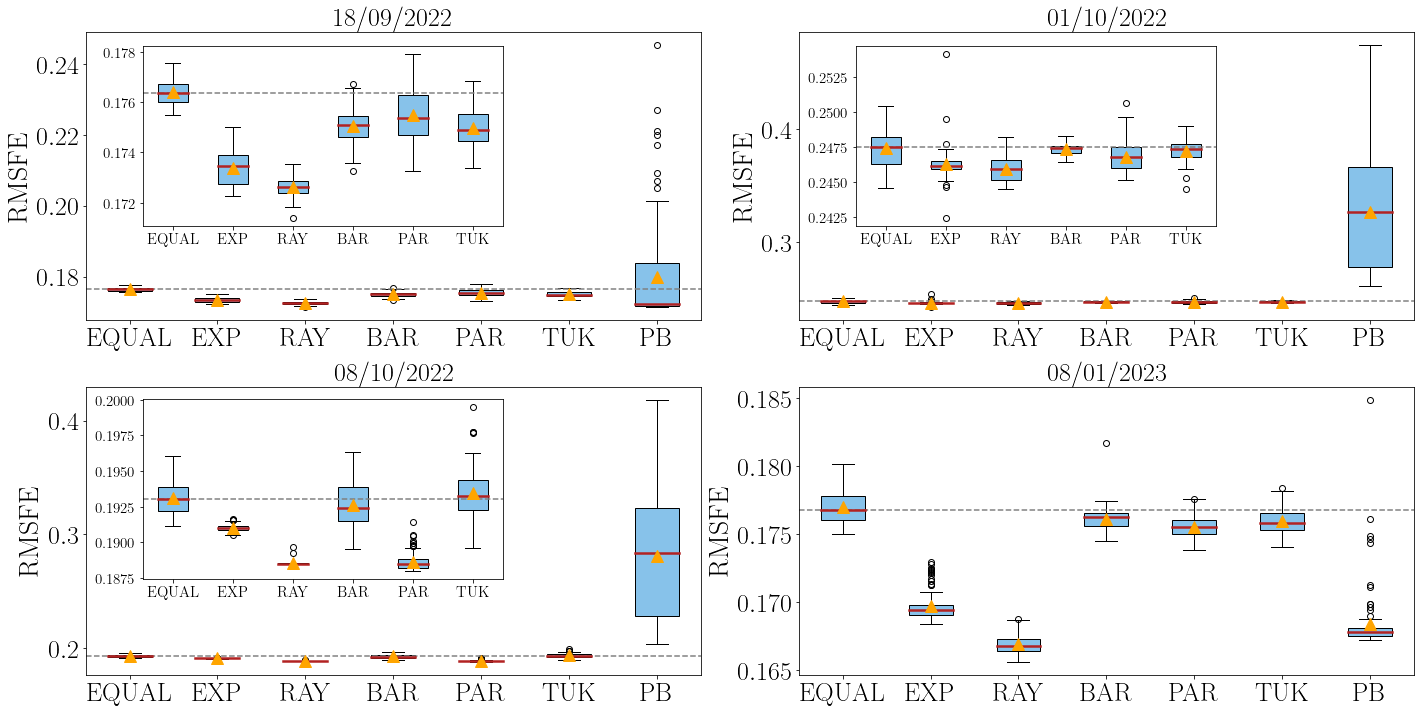

In [113]:
fig, axs = plt.subplots(2,2, figsize=(20, 10))
cmap = plt.get_cmap("tab10")
medianprops = dict(linewidth=2.5, color='firebrick')
meanprops = dict(markerfacecolor='orange', markeredgecolor='orange', markersize='12')
boxprops=dict(facecolor=adjust_lightness(cmap(0),1.75))

for i in range(len(dates)):
    df_data = pd.DataFrame()
    for j in range(len(weight_type)+2):
        if j==0:
            with np.load(path+'Results/'+data_names[i]+'_'+str_model+'_results.npz') as data:
                df_data = pd.concat([df_data,pd.DataFrame(data['all_metrics'][:,metric])], axis=1, ignore_index=True)
        elif j==len(weight_type)+1:
            with np.load(path+'Results/'+data_names[i]+'_postbreak_'+str_model+'_results.npz') as data:
                df_data = pd.concat([df_data,pd.DataFrame(data['all_metrics'][:,metric])], axis=1, ignore_index=True)
        else:    
            with np.load(path+'Results/'+data_names[i]+'_'+str_model+'_'+weight_type[j-1]+'_results.npz') as data:
                df_data = pd.concat([df_data,pd.DataFrame(data['all_metrics'][:,metric])], axis=1, ignore_index=True)
    if i==0:
        i1 = 0
        i2 = 0
    elif i==1:
        i1 = 0
        i2 = 1
    elif i==2:
        i1 = 1
        i2 = 0
    else:
        i1 = 1
        i2 = 1
    
    axs[i1,i2].boxplot(df_data, showmeans=True,patch_artist=True,medianprops=medianprops,meanprops=meanprops,boxprops=boxprops)
    axs[i1,i2].axhline(np.median(df_data.iloc[:,0]), linestyle='--', color='grey')
    axs[i1,i2].set_title(dates[i])
    axs[i1,i2].set_ylabel('RMSFE')
    axs[i1,i2].set_xticks(list(range(1,len(weight_type)+3)),ind[:len(weight_type)+2])
    
    # add zooms plots
    if i==0:
        axszoom = fig.add_axes([0.11,0.68,0.25,0.25])
        axszoom.boxplot(df_data.iloc[:,:len(df_data.columns)-1], showmeans=True,patch_artist=True,medianprops=medianprops,meanprops=meanprops,boxprops=boxprops)
        axszoom.axhline(np.median(df_data.iloc[:,0]), linestyle='--', color='grey')
        axszoom.set_xticks(list(range(1,len(weight_type)+2)),ind[:len(weight_type)+1])
        axszoom.tick_params(labelsize=15)
    elif i==1:
        axszoom = fig.add_axes([0.605,0.68,0.25,0.25])
        axszoom.boxplot(df_data.iloc[:,:len(df_data.columns)-1], showmeans=True,patch_artist=True,medianprops=medianprops,meanprops=meanprops,boxprops=boxprops)
        axszoom.axhline(np.median(df_data.iloc[:,0]), linestyle='--', color='grey')
        axszoom.set_xticks(list(range(1,len(weight_type)+2)),ind[:len(weight_type)+1])
        axszoom.tick_params(labelsize=15)
    elif i==2:
        axszoom = fig.add_axes([0.11,0.19,0.25,0.25])
        axszoom.boxplot(df_data.iloc[:,:len(df_data.columns)-1], showmeans=True,patch_artist=True,medianprops=medianprops,meanprops=meanprops,boxprops=boxprops)
        axszoom.axhline(np.median(df_data.iloc[:,0]), linestyle='--', color='grey')
        axszoom.set_xticks(list(range(1,len(weight_type)+2)),ind[:len(weight_type)+1])
        axszoom.tick_params(labelsize=15)

fig.tight_layout()
plt.subplots_adjust(wspace=0.16)
plt.savefig(path+'Figures/'+'overallperf_voltage_'+str_model+'.pdf', bbox_inches='tight')
plt.show()